In [1]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential

from keras.layers import Conv2D, Flatten, Input, MaxPooling2D, Flatten, AveragePooling2D, Dense
from keras.models import Model
from sklearn.preprocessing import OneHotEncoder

# Task 1: Load the MNIST dataset into your notebook


In [2]:
# loading a dataset
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

# Task 2: Pre-processing and prepare the data for giving to the CNN.
### a. Encoding the classes using one hot encoder.
### b. Normalize the features.

In [7]:
# normalizing
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
ohe = OneHotEncoder(sparse = False)
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test  = ohe.fit_transform(y_test.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
# Reshaping the dataset
# Building the input vector into 4D tensor (i.e 1) ([0] means keeping the first dimension as it is)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [11]:
X_train[0].shape

(28, 28, 1)

# Task 3: Building the convolutional network model.
### a. You may choose the layers.
### b. Print the summary and note the number of neurons and parameters of the model.
### c. Compile the model and train it using the training data.

In [12]:
input = Input(shape = (28, 28, 1))
x = Conv2D(filters = 64,    # total no of filters
           kernel_size = 3, # size of the filters
           activation = 'relu')(input)
x = MaxPooling2D()(x)
x = Conv2D(filters = 128,
           kernel_size = 3,
           activation = 'relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(filters = 32,
           kernel_size = 3,
           activation = 'relu')(x)
x = MaxPooling2D()(x) # 3D matrix data
x = Flatten()(x)      # Connecting to a Dense NN
output = Dense(10,activation = 'softmax')(x)

In [14]:
model = Model(inputs=input, outputs = output)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          36896 

In [16]:
model.compile(optimizer = 'adam',
             loss= 'categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =5)

Epoch 1/5
1875/1875 [==============================] - 137s 72ms/step - loss: 0.2087 - accuracy: 0.9360 - val_loss: 0.0903 - val_accuracy: 0.9724
Epoch 2/5
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0745 - accuracy: 0.9767 - val_loss: 0.0543 - val_accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 128s 69ms/step - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.0585 - val_accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0608 - val_accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0418 - val_accuracy: 0.9864


In [17]:
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 19ms/step - loss: 0.0418 - accuracy: 0.9864
Test Loss: 0.04178265482187271
Test accuracy: 0.9864000082015991


# Task 4: Vary the number of layers and repeat step 3.


In [18]:
input = Input(shape = (28, 28, 1))
x = Conv2D(filters = 64,
           kernel_size = 3,
           activation = 'relu')(input)
x = AveragePooling2D()(x)
x = Conv2D(filters = 128,
           kernel_size = 3,
           activation = 'relu')(x)
x = AveragePooling2D()(x)
x = Conv2D(filters = 32,
           kernel_size = 3,
           activation = 'relu')(x)
x = AveragePooling2D()(x)
x = Flatten()(x)
output = Dense(10,activation = 'softmax')(x)

In [19]:
model1 = Model(inputs=input, outputs = output)

In [21]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 128)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          3689

In [22]:
model1.compile(optimizer = 'adam',
             loss= 'categorical_crossentropy',
             metrics=['accuracy'])
history2 = model1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =5)

Epoch 1/5
1875/1875 [==============================] - 136s 72ms/step - loss: 0.2872 - accuracy: 0.9108 - val_loss: 0.1054 - val_accuracy: 0.9673
Epoch 2/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1079 - accuracy: 0.9670 - val_loss: 0.0788 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.0696 - val_accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0638 - accuracy: 0.9813 - val_loss: 0.0521 - val_accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0628 - val_accuracy: 0.9799


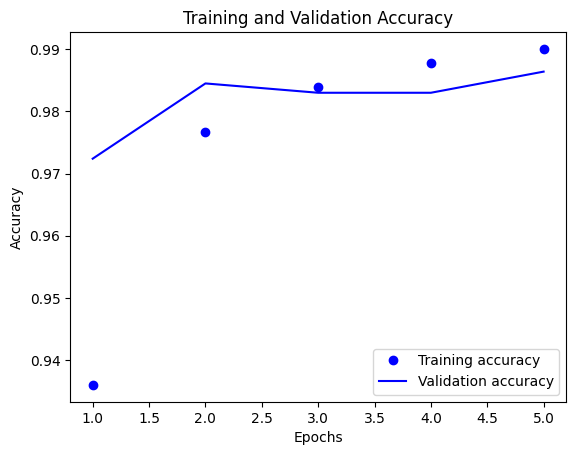

In [23]:
history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Corrected label to 'Accuracy'
plt.legend()
plt.show()

In [24]:
score = model1.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.0628 - accuracy: 0.9799
Test Loss: 0.06281796842813492
Test accuracy: 0.9799000024795532


# Task 5: Implement the architecture of LeNet 5.

In [25]:
# LeNet architecture
inputs = Input(shape = (28, 28, 1))
x = Conv2D(filters = 6,
           kernel_size = (5, 5),
           activation = 'tanh', padding ='same', strides = 1)(inputs)
x = AveragePooling2D(strides=2,
                     pool_size =(2, 2))(x)
x = Conv2D(filters = 16,
           kernel_size = (5, 5),
           activation = 'tanh', padding='valid')(x)
x = AveragePooling2D(strides=2,
                 pool_size =(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation = 'tanh')(x)
x = Dense(84, activation='tanh')(x)
outputs = Dense(10, activation = 'softmax')(x)

In [26]:
lenet = Model(inputs=inputs, outputs = outputs)
lenet.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_3 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_4 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 400)               0   

In [27]:
lenet.compile(optimizer = 'adam',
             loss= 'categorical_crossentropy',
             metrics=['accuracy'])
history3 = lenet.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =5)

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2280 - accuracy: 0.9322 - val_loss: 0.1025 - val_accuracy: 0.9681
Epoch 2/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0836 - accuracy: 0.9740 - val_loss: 0.0680 - val_accuracy: 0.9771
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0651 - val_accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0525 - val_accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0365 - accuracy: 0.9878 - val_loss: 0.0564 - val_accuracy: 0.9834


In [28]:
score = lenet.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0564 - accuracy: 0.9834
Test Loss: 0.056421563029289246
Test accuracy: 0.9833999872207642


# Task 6: Finally note which network gives you the best performance.
#### Model 1 gives us the highest Test accuracy of 98.5%

## Learning Outcomes/Conclusion

1. **Data Preprocessing**: Understanding the essential data preprocessing steps, including one-hot encoding for class labels and feature normalization, to prepare data for deep learning.

2. **CNN Model Construction**: Building and training Convolutional Neural Networks (CNNs) with different layer configurations, gaining practical knowledge in network architecture design.

3. **Layer Variation Impact**: Discovering the effect of varying the number of layers in a CNN on model performance, which can help in making informed design choices.

4. **LeNet-5 Implementation**: Implementing the LeNet-5 architecture, a classic CNN design, to explore its structure and applications in image recognition tasks.

5. **Performance Evaluation**: Evaluating and comparing the performance of different network architectures on the MNIST dataset, with Model 1 identified as the best-performing model for the task.
